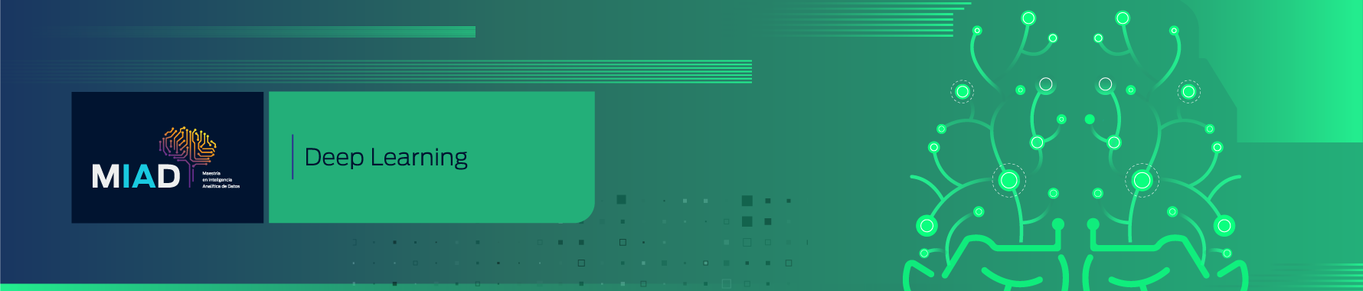

# Deep learning - Semana 4: Regularización y calibración en Deep Learning
## Redes neuronales: Métodos de regularización con Keras

### Propósito
En esta actividad podrán poner en práctica el uso de diferentes métodos de regularización para la calibración de hiper-parámetros en una red neuronal de tipo feedforward. En particular, usaremos métodos de penalización de norma 1 y norma 2, "dropout" e "earlystopping" implementados en el paquete Keras.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Cargando los datos

En primer lugar, cargaremos datos del National Institute of Diabetes and Digestive and Kidney Diseases.

En este contexto, la variable de respuesta corresponde a si la observación corresponde a un paciente con diabetes (y=1) o si no lo es (y=0) y las variables predictivas son las siguientes:


1. Número de veces en embarazo
2. Concentración de glucosa a 2 horas de test de tolerancia
3. Presión sanguínea diastólica
4. Grosor de pliegue de triceps
5. Insulina 2 horas
6. Índice de masa corporal
7. Función de pedigree de diabetes 
8. Edad

In [2]:
# Cargar los datos
dataset = pd.read_csv('test2.csv', sep=",").to_numpy()  
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

### Definición del modelo sin regularización
Se define el modelo con 3 capas. Cada una con una función de activación y un número de neuronas, así:

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=8, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Penalización

En general, el problema que se aborda en machine learning corresponde a encontrar la función que minimice cierta función de pérdida:

$$\hat{\theta}=argmin_{\theta\in\mathcal{R^{p}}}\mathcal{J}(\theta,X,y)$$

De esta manera, en un problema de regresión, $\mathcal{J}(\theta,X,y)$ corresponde al error cuadrático medio y, en un problema de clasificación con dos clases, corresponde a la función de entropía cruzada binaria.

Sin embargo, para evitar el problema de sobreajuste, es posible añadir un término de penalización adicional a la función de pérdida y así sea posible regularizar la función que se obtiene en este proceso. De manera analítica se tendría lo siguiente:

$$\hat{\theta}=argmin_{\theta\in\mathcal{R^{p}}}\mathcal{J}(\theta,X,y)+\alpha\Omega(\theta)$$

Donde $\alpha\Omega(\theta)$ es un término que típicamente restringe la complejidad o flexibilidad de la función a estimar. Por ejemplo, en un modelo de regresión lineal, es posible utilizar un término de penalización que restrinja el tamaño del vector de parámetros:

$$\hat{\beta}=argmin_{\beta \in\mathcal{R}^{p}}(Y-X\beta)^{T}(Y-X\beta)+\alpha||\beta||^{m}$$

Donde $||v||^{m}$ correponde a la norma $L^{m}$ del vector $v$ en el espacio correspondiente.


### Penalización $L^{1}$

En este caso, se está utilizando la siguiente expresión para la penalización de la función de pérdida:

$$\hat{w}=argmin_{w\in\mathcal{R^{p}}}\mathcal{J}(w,X,y)+\alpha \sum_{i=1}^{p}|w_{i}|$$

Donde $|a|$ corresponde al valor absoluto del número $a$.

Así, para implementar este tipo de penalización en cada una de las capas, utilizamos el siguiente código, donde se utilizan 3 capas en la definición del modelo y se establece $\alpha=0.01$:

In [4]:
model1 = Sequential()
model1.add(Dense(30, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l1(0.01)))
model1.add(Dense(1, activation='sigmoid'))

### Penalización $L^{2}$
En este caso, se está utilizando la siguiente expresión para la penalización de la función de pérdida:

$$\hat{w}=argmin_{\theta\in\mathcal{R^{p}}}\mathcal{J}(w,X,y)+\alpha \sum_{i=1}^{p}w_{i}^{2}$$

Así, para implementar este tipo de penalización en cada una de las capas, utilizamos el siguiente código, donde se utilizan 3 capas en la definición del modelo y se establece $\alpha=0.01$:

In [5]:
model2 = Sequential()
model2.add(Dense(30, input_dim=8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(20, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model2.add(Dense(1, activation='sigmoid'))

### Dropout

Este tipo de regularización corresponde a imponer la restricción de que algunos pesos sean iguales a cero con cierta probabilidad determinada por parámetro. Es decir, se tiene la siguiente definición para los parámetros de los pesos:

$$\hat{w}_{i}=(1-B_{i})w_{i}$$

Donde:

$$B_{i} \sim Bernoulli(p_{i})$$

y $p_i$ es la probabilidad de abandono o _dropout_. Para implementar lo anterior se utiliza el siguiente código para un modelo con tres capas y $p_{i}=0.05$ para todos los nodos:

In [6]:
modeldp = Sequential()
modeldp.add(Dense(30, input_dim=8, activation='relu'))
modeldp.add(Dropout(0.05))
modeldp.add(Dense(20, activation='relu'))
modeldp.add(Dropout(0.05))
modeldp.add(Dense(1, activation='sigmoid'))

### Early stopping
Este tipo de regularización hace que el procedimiento de optimización de gradiente descendiente no se realice hasta su convergencia, sino que se detenga de manera temprana para así evitar el sobreajuste de los datos, evitando una función de pérdida muy baja que podría ser engañosa. Para implementar esto, construiremos una red neuronal y se utilizará el callback EarlyStopping cuando se ajuste el modelo (instrucción ".fit").

In [7]:
modeles = Sequential()
modeles.add(Dense(30, input_dim=8, activation='relu'))
modeles.add(Dense(20, activation='relu'))
modeles.add(Dense(1, activation='sigmoid'))

### Compilación de los modelos 

Se debe seleccionar un función de pérdida, que en este caso es la función cross-entropy, el optimizador y el accuracy que se quiere evaluar. 

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeldp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeles.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Se entrenan los modelos con los datos de entrenamiento

In [9]:
history=model.fit(X_train, y_train, epochs=25, batch_size=10 )
history1=model1.fit(X_train, y_train, epochs=25, batch_size=10 )
history2=model2.fit(X_train, y_train, epochs=25, batch_size=10 )
historydp=modeldp.fit(X_train, y_train, epochs=25, batch_size=10 )
historyes=modeles.fit(X_train, y_train, epochs=25, batch_size=10 , callbacks = [EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/25
614/614 [==============================] - 0s 450us/step - loss: 0.8749 - accuracy: 0.6156
Epoch 2/25
614/614 [==============================] - 0s 151us/step - loss: 0.7623 - accuracy: 0.6515
Epoch 3/25
614/614 [==============================] - 0s 92us/step - loss: 0.6583 - accuracy: 0.6710
Epoch 4/25
614/614 [==============================] - 0s 96us/step - loss: 0.6742 - accuracy: 0.6775
Epoch 5/25
614/614 [==============================] - 0s 88us/step - loss: 0.6530 - accuracy: 0.6840
Epoch 6/25
614/614 [==============================] - 0s 94us/step - loss: 0.6380 - accuracy: 0.6775
Epoch 7/25
614/614 [==============================] - 0s 82us/step - loss: 0.6262 - accuracy: 0.6906
Epoch 8/25
614/614 [==============================] - 0s 95us/step - loss: 0.6684 - accuracy: 0.7085
Epoch 9/25
614/614 [==============================] - 0s 90us/step - loss: 0.6531 - accuracy: 0.6775
Epoch 10/25
614/614 [==============================] - 0s 84us/step - loss: 0.7578 - accu

Se calcula el accuracy de los modelos con las bases de datos de train

In [10]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = modeldp.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = modeles.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

614/614 [==============================] - 0s 41us/step
Accuracy: 71.17
614/614 [==============================] - 0s 54us/step
Accuracy: 70.68
614/614 [==============================] - 0s 49us/step
Accuracy: 72.80
614/614 [==============================] - 0s 66us/step
Accuracy: 71.99
614/614 [==============================] - 0s 47us/step
Accuracy: 72.31


Se hacen predicciones utilizando los modelos

In [11]:
predicciones = model.predict(X_test)
redondeado = [round(x[0]) for x in predicciones]
predicciones = (model.predict(X_test) > 0.5).astype(int)

predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

prediccionesdp = modeldp.predict(X_test)
redondeadodp = [round(x[0]) for x in predicciones]
prediccionesdp = (modeldp.predict(X_test) > 0.5).astype(int)


prediccioneses = modeles.predict(X_test)
redondeadoes = [round(x[0]) for x in prediccioneses]
prediccioneses = (modeles.predict(X_test) > 0.5).astype(int)

Accuracy en el set de test

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_lossdp, test_accdp = modeldp.evaluate(X_test, y_test)
test_losses, test_acces = modeles.evaluate(X_test, y_test)

154/154 [==============================] - 0s 18us/step


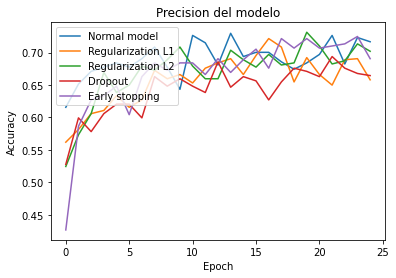

In [13]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(historydp.history['accuracy'])
plt.plot(historyes.history['accuracy'])
plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

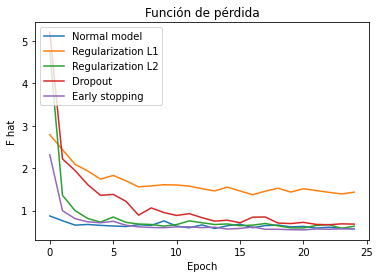

In [16]:
# Graficar la función de pérdida evaluada
plt.title('Función de pérdida')
plt.ylabel('F hat')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(historydp.history['loss'])
plt.plot(historyes.history['loss'])
plt.legend(['Normal model', 'Regularization L1', 'Regularization L2', 'Dropout', 'Early stopping' ], loc='upper left')
plt.show()

### Ejercicio no evaluable:

Intente cambiar los hiper-parámetros para encontrar un mejor _acurracy_ en la muestra de _test_.